In [112]:
import numpy as np 
import pandas as pd
import os
import glob
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg
import numpy as np
import pandas as pd

import matplotlib 
import matplotlib.pyplot as plt
from matplotlib import gridspec
import matplotlib.lines as lines

import seaborn as sns

from scipy.signal import periodogram
from statsmodels.graphics.tsaplots import plot_pacf
import random

from pathlib import Path

import time
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_colwidth', False)


In [4]:
articles_data_path = "/Users/sankalpapharande/Documents/2nd Semester/Applied ML/AML Project/articles.csv"
customer_data_path = "/Users/sankalpapharande/Documents/2nd Semester/Applied ML/AML Project/customers.csv"
transaction_data_path = "/Users/sankalpapharande/Documents/2nd Semester/Applied ML/AML Project/transactions_train.csv"

In [6]:
articles_data = pd.read_csv(articles_data_path)
customers_data = pd.read_csv(customer_data_path)
transaction_data = pd.read_csv(transaction_data_path)

## Articles Data EDA

In [7]:
articles_data.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


## Meaning of few these columns:
1. article_id: unique identifier of the article
2. product_code, prod_name: Product category where that article belongs
3. product_type_no,	product_type_name: Type of the Product where that article belongs
4. product_group_name: Group of the product. 

## Counts of various Articles data columns

In [102]:
print("Article Data Shape: \n{}\n".format(articles_data.shape))
print("Product name values count: \n{}\n".format(articles_data.prod_name.value_counts()))
print("Number of unique product names: \n{}\n".format(articles_data.prod_name.nunique()))
print("Product Type Name values count: \n{}\n".format(articles_data.product_type_name.value_counts()))
print("Number of unique product type names: \n{}\n".format(articles_data.product_type_name.nunique()))
print("Product group name values count: \n{}\n".format(articles_data.product_group_name.value_counts()))

Article Data Shape: 
(105542, 25)

Product name values count: 
Dragonfly dress          98
Mike tee                 72
Wow printed tee 6.99     70
1pk Fun                  55
TP Paddington Sweater    54
                         ..
Pankhurts dungarees       1
Paradis AOP               1
Rainboot fancy SB         1
BB Messi NASA             1
Daisy mesh ls             1
Name: prod_name, Length: 45875, dtype: int64

Number of unique product names: 
45875

Product Type Name values count: 
Trousers        11169
Dress           10362
Sweater          9302
T-shirt          7904
Top              4155
                ...  
Keychain            1
Blanket             1
Washing bag         1
Towel               1
Bra extender        1
Name: product_type_name, Length: 131, dtype: int64

Number of unique product type names: 
131

Product group name values count: 
Garment Upper body       42741
Garment Lower body       19812
Garment Full body        13292
Accessories              11158
Underwear      

## Finding top categories in eah product feature

In [49]:
# articles_data.groupby('product_type_name')['product_type_name'].count()..plot.bar()
df = articles_data[['product_type_name']].groupby(['product_type_name'])['product_type_name'] \
                             .count() \
                             .reset_index(name='count') \
                             .sort_values(['count'], ascending=False).head(20)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 112 to 42
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   product_type_name  20 non-null     object
 1   count              20 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 480.0+ bytes


In [56]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
plt.rcParams["figure.figsize"] = (20,3)

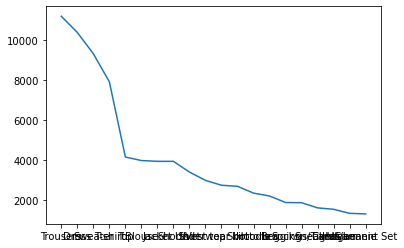

In [45]:
plt.plot(df['product_type_name'], df['count'])

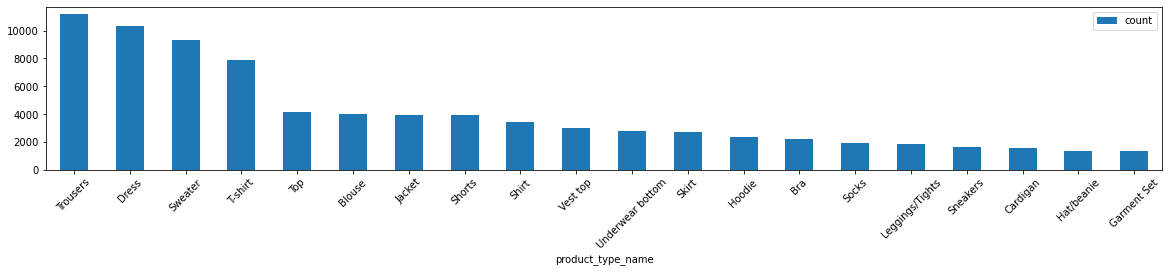

In [59]:
# fig, ax = figure(figsize=(8, 6), dpi=80)
ax = df.plot.bar(x='product_type_name', y='count', rot=45)

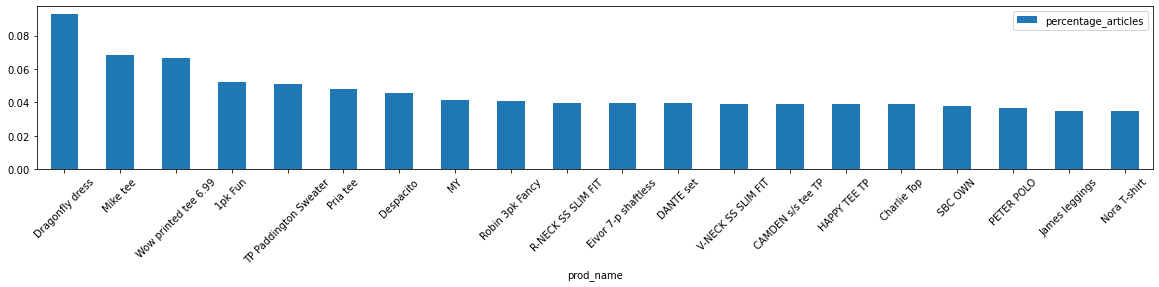

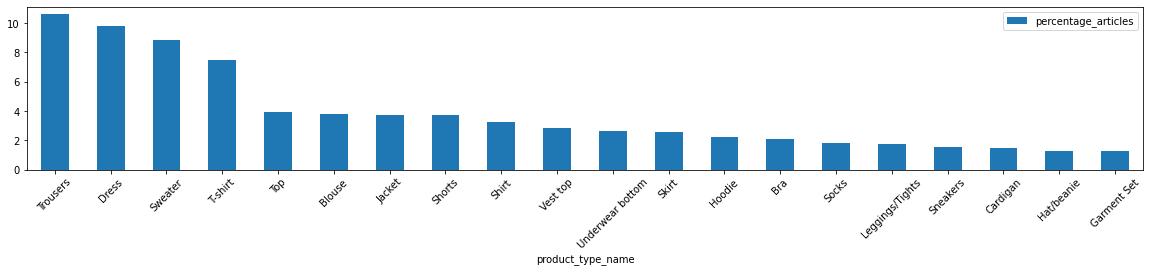

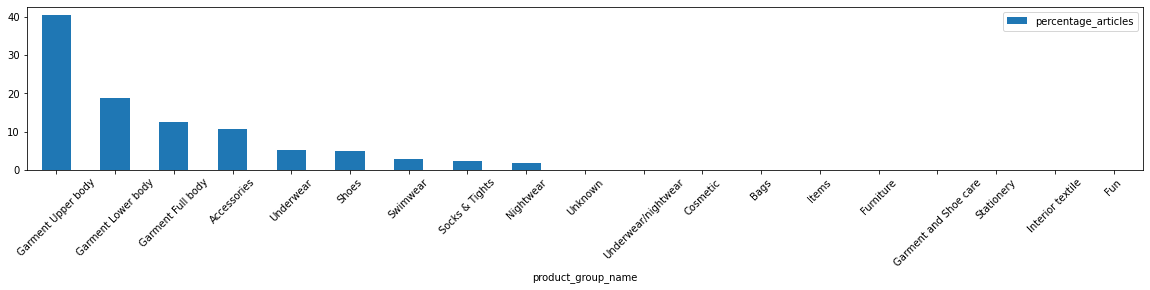

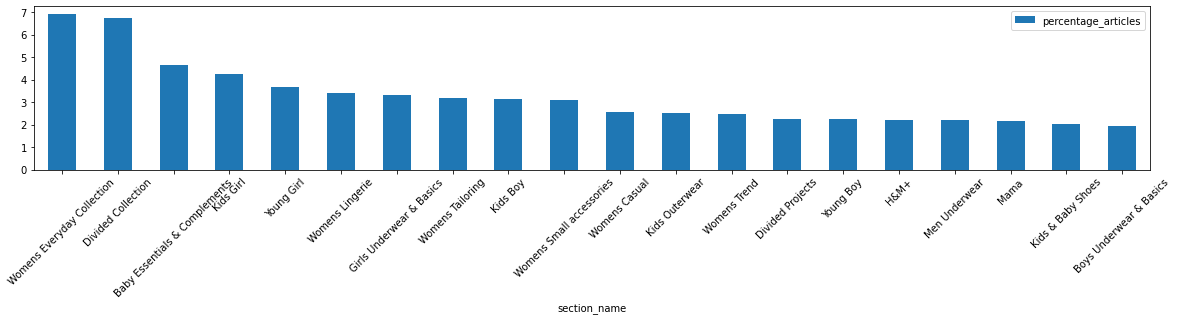

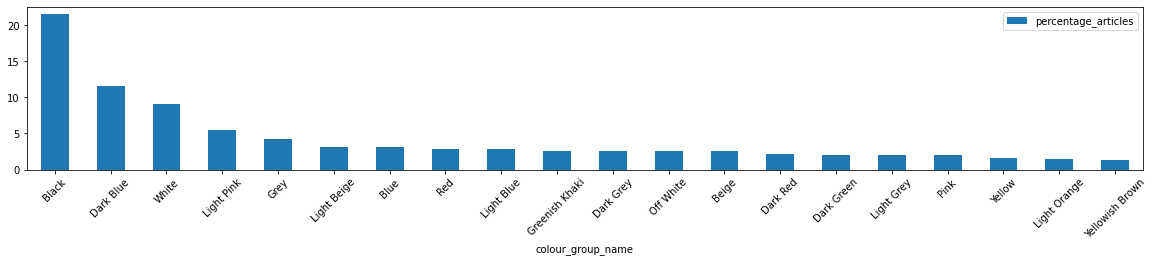

In [71]:
columns = ['prod_name', 'product_type_name', 'product_group_name', 'section_name', 'colour_group_name']
for column in columns:
    df = articles_data[[column]].groupby([column])[column] \
                             .count() \
                             .reset_index(name='count') \
                             .sort_values(['count'], ascending=False).head(20)
    df['percentage_articles'] = df['count']*100/float(articles_data.shape[0])
    ax = df.plot.bar(x=column, y='percentage_articles', rot=45)

In [61]:
### Your code here
column_names = articles_data.columns

for column in column_names:
    print("{}: Count of Missing Values {}".format(column, articles_data[column].isnull().sum()))

# ## Prining few rows having missing values in the columns
# missing_values_df = articles_data[articles_data['mileage'].isnull() == True]
# missing_values_df.head()

article_id: Count of Missing Values 0
product_code: Count of Missing Values 0
prod_name: Count of Missing Values 0
product_type_no: Count of Missing Values 0
product_type_name: Count of Missing Values 0
product_group_name: Count of Missing Values 0
graphical_appearance_no: Count of Missing Values 0
graphical_appearance_name: Count of Missing Values 0
colour_group_code: Count of Missing Values 0
colour_group_name: Count of Missing Values 0
perceived_colour_value_id: Count of Missing Values 0
perceived_colour_value_name: Count of Missing Values 0
perceived_colour_master_id: Count of Missing Values 0
perceived_colour_master_name: Count of Missing Values 0
department_no: Count of Missing Values 0
department_name: Count of Missing Values 0
index_code: Count of Missing Values 0
index_name: Count of Missing Values 0
index_group_no: Count of Missing Values 0
index_group_name: Count of Missing Values 0
section_no: Count of Missing Values 0
section_name: Count of Missing Values 0
garment_group_n

In [62]:
missing_values_df = articles_data[articles_data['detail_desc'].isnull() == True]
missing_values_df.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
1467,351332007,351332,Marshall Lace up Top,252,Sweater,Garment Upper body,1010018,Treatment,7,Grey,...,Jersey Fancy DS,D,Divided,2,Divided,58,Divided Selected,1005,Jersey Fancy,NaN
2644,420049002,420049,OL TAGE PQ,87,Boots,Shoes,1010016,Solid,13,Beige,...,Premium Quality,C,Ladies Accessories,1,Ladieswear,64,Womens Shoes,1020,Shoes,NaN
2645,420049003,420049,OL TAGE PQ,87,Boots,Shoes,1010016,Solid,23,Dark Yellow,...,Premium Quality,C,Ladies Accessories,1,Ladieswear,64,Womens Shoes,1020,Shoes,NaN
2742,426199002,426199,Ellen Shortie Daisy Low 3p,286,Underwear bottom,Underwear,1010016,Solid,9,Black,...,Casual Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear",NaN
2743,426199010,426199,Ellen Shortie Daisy Low 3p,286,Underwear bottom,Underwear,1010017,Stripe,8,Dark Grey,...,Casual Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear",NaN


In [63]:
null_count = articles_data[articles_data.isnull().any(axis=1)].shape[0]
print("{} % rows contain at least one column value as Null".format(null_count*100/articles_data.shape[0]))

0.3941558810710428 % rows contain at least one column value as Null


In [65]:
articles_data.nunique()

article_id                      105542
product_code                     47224
prod_name                        45875
product_type_no                    132
product_type_name                  131
product_group_name                  19
graphical_appearance_no             30
graphical_appearance_name           30
colour_group_code                   50
colour_group_name                   50
perceived_colour_value_id            8
perceived_colour_value_name          8
perceived_colour_master_id          20
perceived_colour_master_name        20
department_no                      299
department_name                    250
index_code                          10
index_name                          10
index_group_no                       5
index_group_name                     5
section_no                          57
section_name                        56
garment_group_no                    21
garment_group_name                  21
detail_desc                      43404
dtype: int64

In [68]:
articles_data.shape

(105542, 25)

<AxesSubplot:title={'center':'index_name distibution'}, ylabel='None'>

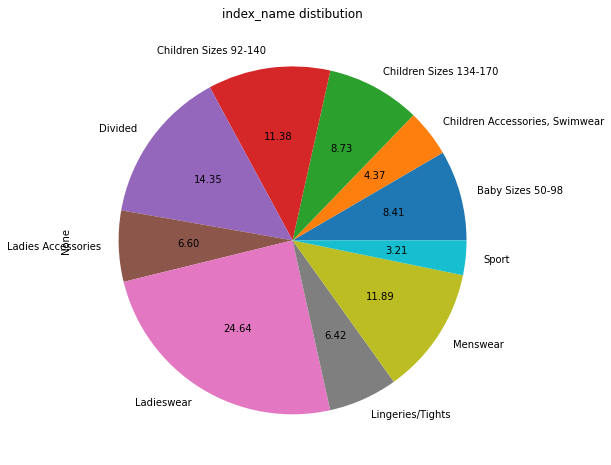

In [92]:
pie, ax = plt.subplots(figsize=[16,8])
articles_data.groupby('index_name').size().plot(kind='pie',autopct='%.2f',ax=ax,title='index_name distibution')

## Customer Data EDA

In [72]:
customers_data.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


## Feature Meaning
1. customer_id: unique identifier of the customer
2. FN: "Active" tells us something about fashion news delivering status. FN is if a customer get Fashion News newsletter, Active is if the customer is active for communication
3. Active: Whether fashion news are being sent to customer of not. In short whether customer is part of Messaging campaign
4. club_member_status: Whether customer is club member or not
5. fashion_news_frequency: How frequently fashion news are sent to the customer
6. age: age of the customer
7. postal_code: Encripted postal code of the customer

In [73]:
customers_data['FN'].unique()

array([nan,  1.])

In [74]:
customers_data['Active'].unique()

array([nan,  1.])

In [75]:
customers_data['club_member_status'].unique()

array(['ACTIVE', nan, 'PRE-CREATE', 'LEFT CLUB'], dtype=object)

## Counts of various customer columns

In [101]:
print("Customer Data Shape: \n{}\n".format(customers_data.shape))
print("Active values count: \n{}\n".format(customers_data.Active.value_counts()))
print("Fashion Notification values count: \n{}\n".format(customers_data.FN.value_counts()))
print("Club member status values count: \n{}\n".format(customers_data.club_member_status.value_counts()))
print("Fashion News Frequency values count: \n{}\n".format(customers_data.fashion_news_frequency.value_counts()))

Customer Data Shape: 
(1371980, 7)

Active values count: 
1.0    464404
Name: Active, dtype: int64

Fashion Notification values count: 
1.0    476930
Name: FN, dtype: int64

Club member status values count: 
ACTIVE        1272491
PRE-CREATE      92960
LEFT CLUB         467
Name: club_member_status, dtype: int64

Fashion News Frequency values count: 
NONE         877711
Regularly    477416
Monthly         842
None              2
Name: fashion_news_frequency, dtype: int64



## Transaction Data EDA

In [103]:
transaction_data.head()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2


## Meaning of features:
1. t_dat: Transaction data of the customer
2. customer_id: unique identifier for the customers
3. article_id: id of the purchased product
4. price: The price that customer paid for that particular article id. The unit of price isn't any "currency/unit" as competiton hosts chose to not disclose the real values.
5. sales_channel_id: online/offline channels. 2 is online and 1 store or offline transactions

## Few Observations:
1. Same articles are having different prices on the same date
2. Offline transactions for the month of April 2020 is missing. Possible reasons: COVID -19 Lockdown

In [120]:
transaction_train = pd.read_csv(transaction_data_path)
grouped_df = transaction_train.groupby(["sales_channel_id", "article_id", "t_dat"])
grouped_df["price"].nunique().sort_values(ascending=False)
transaction_train.query("article_id==706016001 & t_dat=='2019-11-29' & sales_channel_id==2")['price'].unique()[:10]

array([0.02167797, 0.01950847, 0.02550847, 0.02710169, 0.02438983,
       0.02352542, 0.02635593, 0.02615254, 0.01862712, 0.02371186])

In [121]:
transaction_train = pd.read_csv(transaction_data_path)
transaction_train.query("article_id==706016001 & t_dat=='2019-11-29' & sales_channel_id==2")['price'].unique()[:10]


array([0.02167797, 0.01950847, 0.02550847, 0.02710169, 0.02438983,
       0.02352542, 0.02635593, 0.02615254, 0.01862712, 0.02371186])

In [108]:
transaction_data.query("article_id==706016001 & t_dat=='2019-11-29' & sales_channel_id==2")['price'].unique()

array([0.02167797, 0.01950847, 0.02550847, 0.02710169, 0.02438983,
       0.02352542, 0.02635593, 0.02615254, 0.01862712, 0.02371186,
       0.02577966, 0.02322034, 0.02567797, 0.02501695, 0.02637288,
       0.02581356, 0.02652542, 0.02032203, 0.02650847, 0.02510169,
       0.02508475, 0.02620339, 0.02532203, 0.02415254, 0.02598305,
       0.02257627, 0.02483051, 0.02611864, 0.02561017, 0.02547458,
       0.02618644, 0.02711864, 0.02664407, 0.02672881, 0.02513559,
       0.02408475, 0.02489831, 0.02594915, 0.02418644, 0.02540678,
       0.02574576, 0.02484746, 0.02528814, 0.02630508, 0.02589831,
       0.02538983, 0.02571186, 0.02488136, 0.02669492, 0.02525424,
       0.02523729, 0.02545763, 0.02564407, 0.02667797, 0.02586441,
       0.02583051, 0.02654237, 0.02591525, 0.02554237, 0.02462712,
       0.02605085, 0.02616949, 0.02638983, 0.02628814, 0.02601695,
       0.02511864, 0.02394915, 0.02454237, 0.02279661, 0.02613559,
       0.02622034, 0.02677966, 0.02255932, 0.02649153, 0.02642

In [109]:
# Convert date to date object
transaction_data["date"] = pd.to_datetime(transaction_data["t_dat"]).dt.date
transaction_data.drop(columns=["t_dat"], inplace=True)

# Extract product name
df_plot = transaction_data.merge(articles_data[["article_id", "prod_name"]],\
     how='left', on=None, left_on='article_id', right_on='article_id', suffixes=('_x', '_y'))

# Calculate the order of the transcation per customer
order_number = df_plot[["date", "customer_id"]].groupby(["date", "customer_id"]).count()
order_number.reset_index(["date", "customer_id"], inplace=True)

order_number['nth_order'] = order_number.sort_values(["customer_id",'date'], ascending=True)\
             .groupby(['customer_id'])\
             .cumcount() + 1
#order_number.loc[order_number["customer_id"]=="000058a12d5b43e67d225668fa1f8d618c13dc232df0cad8ffe7ad4a1091e318",:]

# Join transaction with order of transaction from previous step
df_plot = df_plot.merge(order_number[["date", "customer_id", "nth_order"]],\
     how='left', on=None, left_on=["date", "customer_id"], right_on=["date", "customer_id"], suffixes=('_x', '_y'))

# prepare data for eda
df_plot["flag"] = 1

y_channel= df_plot[["date","sales_channel_id", "customer_id","flag"]]\
    .groupby(["date","sales_channel_id", "customer_id"]).max("flag")
y_channel.reset_index(level="sales_channel_id", inplace=True)

y_channel_2= df_plot.groupby(["date","sales_channel_id"]).agg({"customer_id": lambda num: num.nunique()}) #total price per customer
y_channel_2.columns = ['nb_visitors']
y_channel_2.reset_index(level=["date","sales_channel_id"], inplace=True)


In [110]:
# placeholders for min and max of the axis
xmin = y_channel_2["date"].min()
xmax = y_channel_2["date"].max()

ymin = y_channel_2["nb_visitors"].min() - 1000
ymax = y_channel_2["nb_visitors"].max() + 1000

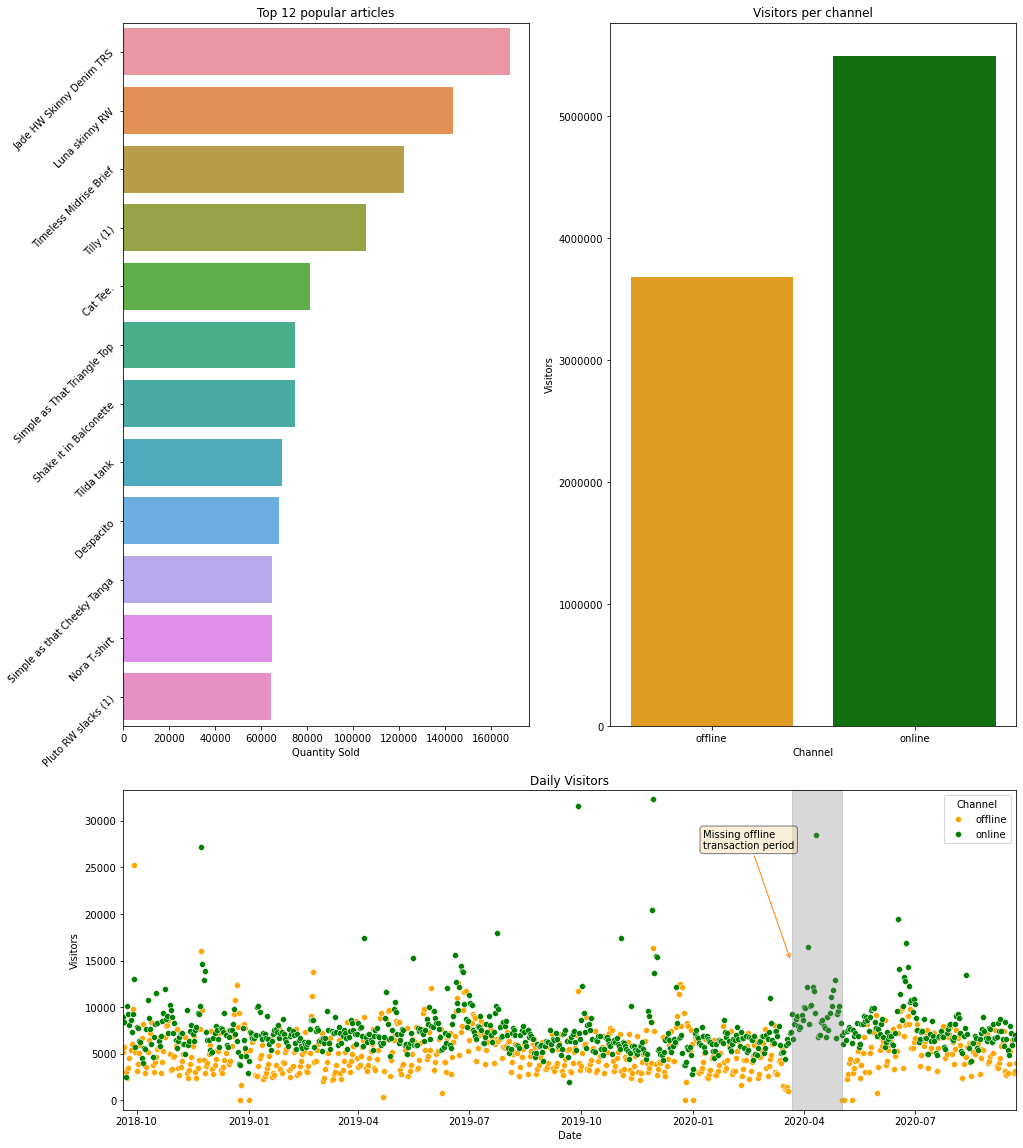

In [114]:
top12= pd.value_counts(df_plot["prod_name"]).iloc[:12]

# plot
fig = plt.figure(constrained_layout=False, figsize=(16,20))
spec = gridspec.GridSpec(ncols=2, nrows=3, figure=fig)

ax1 = fig.add_subplot(spec[:2, 0])
sns.countplot(y="prod_name", ax=ax1, data=df_plot, order=top12.index);
ax1.set(xlabel="Quantity Sold", ylabel = "")
plt.setp(ax1.get_yticklabels(), rotation=45);
ax1.set_title('Top 12 popular articles')

ax3 = fig.add_subplot(spec[:2, 1]);
sns.countplot(x="sales_channel_id", ax=ax3, data=y_channel, palette=["orange", "green"]);
ax3.set(xlabel="Channel", ylabel = "Visitors");
ax3.ticklabel_format(style='plain', useOffset=False, axis='y');
ax3.set_xticklabels(["offline", "online"])
ax3.set_title('Visitors per channel');

ax5 = fig.add_subplot(spec[2, :]);
ax5.set(xlabel="Date", ylabel = "Visitors");
sns.scatterplot(data=y_channel_2.loc[y_channel_2["sales_channel_id"]==1,:],  x="date", y="nb_visitors", color=['orange'], label="offline", ax=ax5)
sns.scatterplot(data=y_channel_2.loc[y_channel_2["sales_channel_id"]==2,:],  x="date", y="nb_visitors", color=['green'], label="online", ax=ax5)
ax5.ticklabel_format(style='plain', useOffset=False, axis='y');
ax5.legend(title="Channel")
ax5.set_title('Daily Visitors');
ax5.set_ylim(ymin, ymax)
ax5.set_xlim(xmin, xmax)

ax5.fill_betweenx([ymin,ymax],18343, 18384, color="gray", alpha=0.3)

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax5.annotate("Missing offline \ntransaction period", (18342, 15000), (18270, 27000), \
    arrowprops={"arrowstyle": "->", "color":"C1"},
    bbox=props,
    fontproperties='italic'
    );

## Observtions:
1. From the second and third plot we can conclude that there are more Online visitors than offline.
2. From the third plot it can be observed that for April-2020 daily transactions are missing for the offline channel.